In [1]:
import matplotlib.pyplot as plt

plt.rc('axes', grid=True)


##### Problem 4.1

Consider composing the two neural networks in figure 4.8. Draw a plot of the  
relationship between the input x and output y′ for x ∈ [−1, 1].  

<div style="max-width:450px;">

![ps-4.1](assets/ps-4.1.jpg)
</div>

##### Problem 4.2

Identify the four hyperparameters in figure 4.6.

<div style="max-width:450px;">

![ps-4.1](assets/fig-4.6.png)
</div>

$Depth =  3$  

$\text{Network capacity} = 9$  

$\begin{aligned}
Width:& \\
D_1 &= 4 \\
D_2 &= 2 \\
D_3 &= 3
\end{aligned}
$  

##### Problem 4.3

Using the non-negative homogeneity property of the ReLU function (see problem  
3.5), show that:

$$
\operatorname{ReLU}\left[\boldsymbol{\beta}_1+\lambda_1 \cdot \boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\boldsymbol{\beta}_0+\lambda_0 \cdot \boldsymbol{\Omega}_0 \mathbf{x}\right]\right]=\lambda_0 \lambda_1 \cdot \operatorname{ReLU}\left[\frac{1}{\lambda_0 \lambda_1} \boldsymbol{\beta}_1+\boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\frac{1}{\lambda_0} \boldsymbol{\beta}_0+\boldsymbol{\Omega}_0 \mathbf{x}\right]\right]
$$
where $\lambda_0$ and $\lambda_1$ are non-negative scalars. From this, we see that the weight matrices can be rescaled by any magnitude as long as the biases are also adjusted, and the scale factors can be re-applied at the end of the network.

$$
\begin{aligned}
&\operatorname{ReLU}\left[\boldsymbol{\beta}_1+\lambda_1 \cdot \boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\boldsymbol{\beta}_0+\lambda_0 \cdot \boldsymbol{\Omega}_0 \mathbf{x}\right]\right] \\
= \space &\operatorname{ReLU}\left[\boldsymbol{\beta}_1+\lambda_1 \cdot \boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\lambda_0 \cdot (\frac{\boldsymbol{\beta}_0}{\lambda_0}+  \boldsymbol{\Omega}_0 \mathbf{x})\right]\right] \\
= \space &\operatorname{ReLU}\left[\boldsymbol{\beta}_1+\lambda_0\lambda_1 \cdot \boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\frac{\boldsymbol{\beta}_0}{\lambda_0}+  \boldsymbol{\Omega}_0 \mathbf{x}\right]\right] \\
= \space &\lambda_0\lambda_1 \cdot \operatorname{ReLU}\left[\frac{\boldsymbol{\beta}_1}{\lambda_0\lambda_1}+ \boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\frac{\boldsymbol{\beta}_0}{\lambda_0}+  \boldsymbol{\Omega}_0 \mathbf{x}\right]\right] \\
= \space &\lambda_0\lambda_1 \cdot \operatorname{ReLU}\left[\frac{1}{\lambda_0\lambda_1} \boldsymbol{\beta}_1+ \boldsymbol{\Omega}_1 \operatorname{ReLU}\left[\frac{1}{\lambda_0} \boldsymbol{\beta}_0+  \boldsymbol{\Omega}_0 \mathbf{x}\right]\right] 
\end{aligned}
$$

##### Problem 4.4

Write out the equations for a deep neural network that takes $D_i$ = 5 inputs, $D_o$ = 4   
outputs and has three hidden layers of sizes $D_1$ = 20, $D_2$ = 10, and $D_3$ = 7, respectively, in   
both the forms of equations 4.15 and 4.16. What are the sizes of each weight matrix $Ω_•$ and    
bias vector $β_•$?

$(4.15)$
$$
\begin{aligned}
h_1 &= \operatorname{a}[\boldsymbol{\beta}_0 + \boldsymbol{\omega}_0 \cdot x] \text{ with } \boldsymbol{\beta}_0 \in \mathbb{R}^{20}, \space \boldsymbol{\omega}_0 \in \mathbb{R}^{20x5} \\
h_2 &= \operatorname{a}[\boldsymbol{\beta}_1 + \boldsymbol{\omega}_1 \cdot h1] \text{ with } \boldsymbol{\beta}_1 \in \mathbb{R}^{10}, \space \boldsymbol{\omega}_1 \in \mathbb{R}^{10x20} \\
h_3 &= \operatorname{a}[\boldsymbol{\beta}_2 + \boldsymbol{\omega}_2 \cdot h2] \text{ with } \boldsymbol{\beta}_2 \in \mathbb{R}^7, \space \boldsymbol{\omega}_2 \in \mathbb{R}^{7x10} \\
y &= \boldsymbol{\beta}_3 + \boldsymbol{\omega}_3 \cdot h_3 \text{ with } \boldsymbol{\beta}_3 \in \mathbb{R}^4, \space \boldsymbol{\omega}_3 \in \mathbb{R}^{4x7}
\end{aligned}
$$

$(4.16)$

$$
y = \boldsymbol{\beta}_3 + \boldsymbol{\omega}_3 \cdot \operatorname{a}[\boldsymbol{\beta}_2 + \boldsymbol{\omega}_2 \cdot \operatorname{a}[\boldsymbol{\beta}_1 + \boldsymbol{\omega}_1 \cdot \operatorname{a}[\boldsymbol{\beta}_0 + \boldsymbol{\omega}_0 \cdot x]]]
$$

##### Problem 4.5

Consider a deep neural network with $D_i$ = 5 inputs, $D_o$ = 1 output, and $K$ = 20  
hidden layers containing $D$ = 30 hidden units each. What is the depth of this network?  
What is the width?

$Width: 30$

$Depth: 20$

##### Problem 4.6

Consider a network with $D_i$ = 1 input, $D_o$ = 1 output, and $K$ = 10 layers, with  
$D$ = 10 hidden units in each. Would the number of weights increase more if we increased the  
depth by one or the width by one? Provide your reasoning.

In [2]:
def total_parameters(layers:int, units_per_layer:int, input_dim:int = 1, output_dim:int = 1) -> int:
    return units_per_layer * (input_dim + 1) + output_dim * (units_per_layer + 1) + (layers - 1) * units_per_layer * (units_per_layer + 1)

def total_intercepts(layers:int, units_per_layer:int, output_dim:int = 1) -> int:
    return units_per_layer * layers + output_dim

K = 10
units_per_layer = 10
weights_depth = total_parameters(layers=K + 1, units_per_layer=units_per_layer) - total_intercepts(layers=K + 1, units_per_layer=units_per_layer)
weights_width = total_parameters(layers=K, units_per_layer=units_per_layer + 1) - total_intercepts(layers=K, units_per_layer=units_per_layer + 1)
print(f"Weights depth: {weights_depth} and total parameters {total_parameters(layers=K + 1, units_per_layer=units_per_layer)}.")
print(f"Weights width: {weights_width} and total parameters {total_parameters(layers=K, units_per_layer=units_per_layer  + 1)}.")

# Therefore increasing the width will result in more weights!

Weights depth: 1020 and total parameters 1131.
Weights width: 1111 and total parameters 1222.


##### Problem 4.7

Choose values for the parameters $ϕ = \{ϕ_{0}, ϕ_{1}, ϕ_{2}, ϕ_{3}, θ_{10}, θ_{11}, θ_{20}, θ_{21}, θ_{30}, θ_{31}\}$ for  
the shallow neural network in equation 3.1 (with ReLU activation functions) that will define an  
identity function over a finite range x ∈ [a, b].  

We have the following equation:

$\begin{aligned} y & =\mathrm{f}[x, \phi] \\ & =\phi_0+\phi_1 \mathrm{a}\left[\theta_{10}+\theta_{11} x\right]+\phi_2 \mathrm{a}\left[\theta_{20}+\theta_{21} x\right]+\phi_3 \mathrm{a}\left[\theta_{30}+\theta_{31} x\right] .\end{aligned}$

An identity function is a function that is defined generally as $f[x] = x$.

Trivially for a, b > 0, we simply can choose $\phi_0, \phi_2, \phi_3, \theta_{10}, \theta_{21}, \theta_{31}, \theta_{20}, \theta_{30}$ = 0 and  $\phi_1,  \theta_{11} = 1$  
There are many possible values for the parameters in hidden cell 1 and 2, since they get nullified by $\phi_2$ and $\phi_3$.

This leads to the following equation:  

$\begin{aligned} y & =\mathrm{f}[x, \phi] \\ & =\mathrm{a}\left[x\right] \\
&= x\end{aligned}$

Since a, b > 0, ReLU behaves linearly $a[x] = x$.

In the case that a, b < 0, we have to make sure to kind of avoid the clipping.  
In problem 3.6, we learned that the non-homogeneity rule does not apply to $\alpha \in \mathbb{R}^-$,  
but it has an interesting effect that it "reverses" your function and when you rescale it   
after ReLU clipped the function, you clipped the positive part instead of the negative part.  
If you are interested you can look into problem-set-3 (3.6).

Therefore we can choose:  
$\theta_{11}, \phi_1 = -1$  and the rest as zero

$\begin{aligned} y & =\mathrm{f}[x, \phi] \\ & = -\mathrm{a}\left[-x\right] \\
&= x\end{aligned}$

But we still have a problem when a < 0 but b > 0.  
To solve this we can combine both of our results in to one, by using two hidden cells.  

$\begin{aligned} y & =\mathrm{f}[x, \phi] \\ & = -\mathrm{a}\left[-x\right] + a[x] \\
&= x\end{aligned}$

In this case our final parameter look like this:  
$\phi_1=\theta_{11}=-1$ and  
$\phi_2=\theta_{21}=1$ and  
the rest as zero.

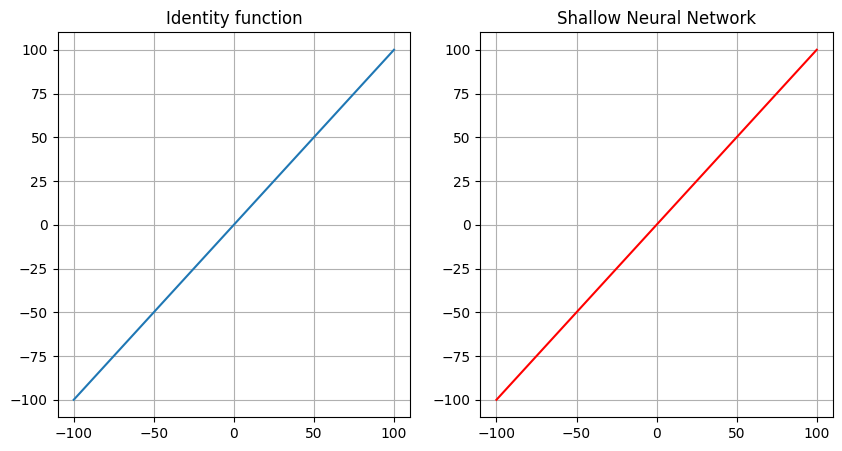

In [3]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def identity_shallow(x):
    # we can ignore the other parameters since they are all zero
    phi_1, theta_11 = -1, -1
    phi_2, theta_21 = 1, 1
    return phi_1 * relu(theta_11 * x) + phi_2 * relu(theta_21 * x)

x = np.linspace(-100, 100, 1000)
shallow_y = identity_shallow(x)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(x, x)
ax[0].set_title("Identity function")

ax[1].plot(x, shallow_y, color='red')
ax[1].set_title("Shallow Neural Network")
plt.show()

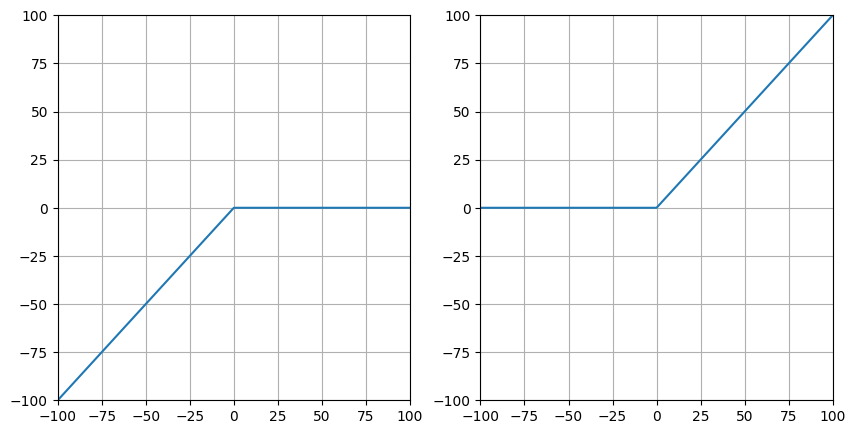

In [4]:
# The idea was:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(x, -relu(-x)) # -a[-x]
ax[0].set_xlim(-100, 100)
ax[0].set_ylim(-100, 100)
ax[1].plot(x, relu(x)) # a[x]
ax[1].set_xlim(-100, 100)
ax[1].set_ylim(-100, 100)

plt.show()

# By adding these two functions we can get the identity function!
# This is exactly what we are doing in the shallow network above!


##### Problem 4.8

Figure 4.9 shows the activations in the three hidden units of a shallow network  
(as in figure 3.3). The slopes in the hidden units are 1.0, 1.0, and -1.0, respectively, and the  
“joints” in the hidden units are at positions 1/6, 2/6, and 4/6. Find values of $ϕ_0, ϕ_1, ϕ_2,$ and $ϕ_3$   
that will combine the hidden unit activations as $ϕ_0 + ϕ_1h_1 + ϕ_2h_2 + ϕ_3h_3$ to create a function  
with four linear regions that oscillate between output values of zero and one. The slope of the  
leftmost region should be positive, the next one negative, and so on. How many linear regions  
will we create if we compose this network with itself? How many will we create if we compose  
it with itself K times?

<div style="max-width:550px;">

![fig-4.9.png](assets/fig-4.9.png)
</div>

We want that it starts at x = 0, at 0 and also want it to end up at y = 1, for x = 1/6.
Here we can see that only $h_3$ is active and therefore it definitely needs to be negative!

But before we figure out $\phi_0 ... \phi_3$, we need to find out all the intercepts $\theta_{10}, \theta_{20}, \theta_{30}$.
We figure them out simply by using the information of the "joint" position.

$$
\begin{aligned}
-\frac{1}{6} &= -\frac{\theta_{10}}{\theta_{11}} \\
\Leftrightarrow \theta_{10} &= -\frac{1}{6} \\
\Rightarrow \theta_{20} &= -\frac{2}{6}, \space \theta_{30} = \frac{4}{6}\\
\end{aligned} \\
$$


$$
\begin{aligned}
&I) \space \phi_0 + \phi_3 \cdot a[\frac{4}{6} - \frac{1}{6}] = 1 \\
&II) \space \phi_0 + \phi_3 \cdot a[\frac{4}{6}] = 0 \\
&\Rightarrow 
    \left[\begin{array}{cc|c}
        1 & 0.5 & 1 \\
        1 & \frac{2}{3} & 0
    \end{array}
    \right] \\
&\Leftrightarrow 
    \left[\begin{array}{cc|c}
        1 & 0.5 & 1 \\
        0 & -\frac{1}{6} & 1
    \end{array}
    \right] \\
& \space \phi_3 = -6, \space \phi_0 = 4
\end{aligned}
$$

Now we know that the next slope is negative and that on the next joint position the y-value should be 0.

$$
\begin{aligned}
&4 + \phi_1 \cdot a[-\frac{1}{6} + \frac{2}{6}] - 6 \cdot a[\frac{4}{6} - \frac{2}{6}] \\
&= 2 + \phi_1 \cdot\frac{1}{6} = 0 \\
&\Leftrightarrow \phi_1 = -12 \\ \\

&4 - 12 \cdot a[-\frac{1}{6} + \frac{4}{6}] + \phi_2 \cdot a[-\frac{2}{6} + \frac{4}{6}] \\
&= -2 + \frac{1}{3} \cdot \phi_2 = 1 \\
&\Leftrightarrow \phi_2 = 9 \\
\end{aligned}
$$

After composing the result to itself once you will get 16 linear regions, since every hidden cell will get 4 new linear regions. In the end you add these 12 new linear regions to the 4 old ones. Generally you can use here the formula $(D+1)^K = 4^K$

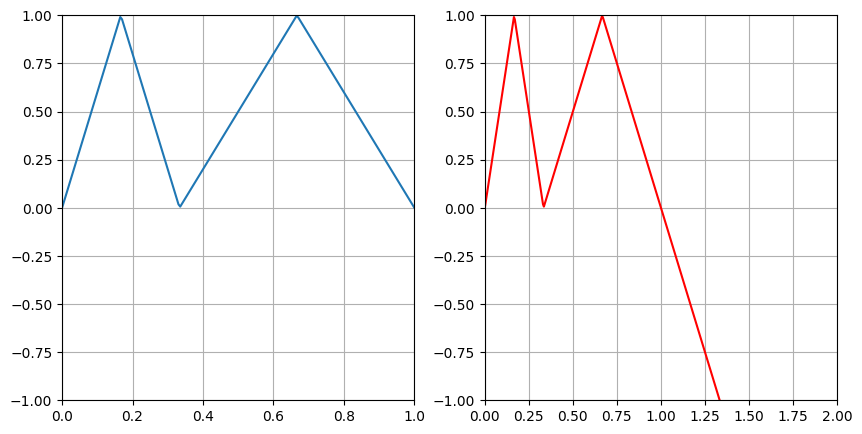

In [5]:
x = np.linspace(0, 5, 1000)

phi_0 = 4
phi_1 = -12
phi_2 = 9
phi_3 = -6
theta_10, theta_11 = -1/6, 1
theta_20, theta_21 = -2/6, 1
theta_30, theta_31 = 2/3, -1

h1 = relu(theta_10 + theta_11 * x)
h2 = relu(theta_20 + theta_21 * x)
h3 = relu(theta_30 + theta_31 * x)
y = phi_0 + phi_1 * h1 + phi_2 * h2 + phi_3 * h3

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].set_ylim(-1, 1) 
ax[0].set_xlim(0, 1)
ax[0].plot(x, y)

ax[1].set_ylim(-1, 1) 
ax[1].set_xlim(0, 2)
ax[1].plot(x, y, color="red")
plt.show()


##### Problem 4.9

Following problem 4.8, is it possible to create a function with three linear regions  
that oscillates back and forth between output values of zero and one using a shallow network  
with two hidden units? Is it possible to create a function with five linear regions that oscillates  
in the same way using a shallow network with four hidden units?

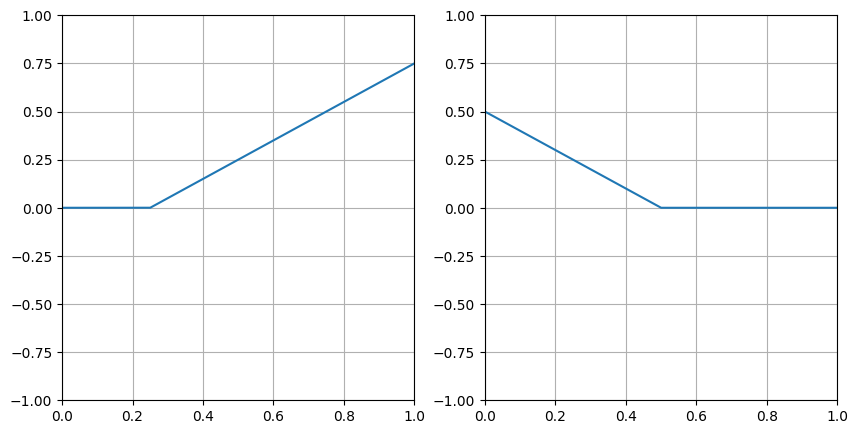

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# at x = 0.25 and x = 0.5 are the joints
theta_10, theta_11 = -0.25, 1
theta_20, theta_21 = 0.5, -1
h1 = relu(theta_10 + theta_11 * x)
h2 = relu(theta_20 + theta_21 * x)
ax[0].plot(x, h1)
ax[0].set_ylim(-1, 1) 
ax[0].set_xlim(0, 1)

ax[1].plot(x, h2)
ax[1].set_ylim(-1, 1) 
ax[1].set_xlim(0, 1)

plt.show()

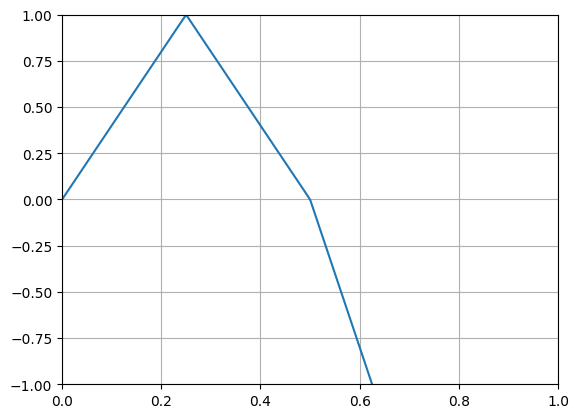

In [7]:
# With the same method as before I calculate the weights and intercepts of the output layer

phi_0 = 2
phi_1 = -8
phi_2 = -4

y = phi_0 + phi_1 * h1 + phi_2 * h2

plt.plot(x, y)
plt.xlim(0, 1)
plt.ylim(-1, 1)
plt.show()

As you see the fourth linear region should go up but it doesn't. The first parameter makes sure that the slope is positive and the other parameter makes sure that the next slope is negative. But for the last region there isn't a parameter combination that could make sure that it is positive. Here you only have the combination where either both are active, one is active and the other isn't and vice versa.  

But the more hidden cells you have the more possibilites you have.  

##### Problem 4.10

Consider a deep neural network with a single input, a single output, and K  
hidden layers, each of which contains D hidden units. Show that this network will have a total  
of 3D + 1 + (K − 1)D(D + 1) parameters.

So first we can use the general formula for the amount of parameters from 3.17, which is:

$D \cdot (D_i + 1) + D_o \cdot (D + D_o)$

Here we have $D_i = 1$ and $D_o = 1$, which leads to

$D \cdot (1 + 1) + 1 \cdot (D + 1) = 2D + D + 1 = 3D + 1$

Now if you think about it for every additional layer, every hidden cell gets: $D$ weights and $1$ intercept.  
Also you have to consider that you only get these additional parameters for $K > 1$    
and this you can write as $(K - 1)$.

With this you get:

$
(K - 1) \cdot D \cdot (D + 1)
$

By adding the previous solution you get the formula above.


##### Problem 4.11

Consider two neural networks that map a scalar input x to a scalar output y.  
The first network is shallow and has D = 95 hidden units. The second is deep and has K = 10  
layers, each containing D = 5 hidden units. How many parameters does each network have?  
How many linear regions can each network make (see equation 4.17)? Which would run faster?  

The first network has:
D = 95
$3D + 1 = 3 \cdot 95 + 1 = 286$ parameters.

The second network has:  
D = 5, K = 10  

$3D + 1 + (K - 1) \cdot D \cdot (D + 1) = 16 + 9 \cdot 30 = 286$ parameters.

I think that the first network would run faster, because  
1) less load and store commands will be executed, since the result of one hidden cell   
has to be saved somewhere then again loaded from the RAM and in worst case from the disk
2) possibility of utilizing multithreading since the calculation of each hidden cell can be done independently.   
This can also be utilized in the second network, but unfortunately a thread would need to wait until all layer calculations would be finished.

But the total max. amount of linear regions in a deep neuronal network is definitely higher.

Generally it is interesting that a deep neuronal network with a fixed amount of neurons in each layer produce a   
exponential amount of linear regions and also only would need an k-root amount of hidden units.   

$(D+1)^K = \text{Linear Regions} \Leftrightarrow D = \sqrt[K]{Linear Regions} - 1$ 

The total amount of hidden cells that you need: $K \cdot D = D_{\text{Total Amount of Hidden Cells}} $

In comparison shallow neuronal networks would even need a linear amount of hidden units to produce the same amount of linear regions.

$D + 1 = \text{Linear Regions} \Leftrightarrow D = \text{Linear Regions} - 1$